In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pima = pd.read_csv('Datasets/diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix, access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

# Instantiate logistic regression model
logreg = LogisticRegression()

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# fit model
# Train the model with X_train and y_train
logreg.fit(X_train, y_train)

y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

# Obtain Accuracy, Precision, Recall, F1-score from below confusion matrix.

In [2]:
confusion = np.array([[118., 12.], [ 47., 15.]])

# confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118.  12.]
 [ 47.  15.]]



# What is accuracy, recall, precision, Specificity and F1-score?
Accuracy, recall, precision, Specificity and F1-score are all obtained from Confision Matrix elements known as : TN, FP, FN, TP
Accuracy: overall, how often is the classifier correct? -> $accuracy = \frac {TP + TN}{TP+TN+FP+FN}$

Classification error: overall, how often is the classifier incorrect? -> $error = 1- accuracy = \frac {FP + FN}{TP + TN + FP + FN}$

Recall: when the actual value is positive, how often is the prediction correct? -> $recall = \frac {TP}{TP + FN}$

Precision: When a positive value is predicted, how often is the prediction correct? -> $precision = \frac {TP}{TP + FP}$

Specificity: When the actual value is negative, how often is the prediction correct? -> $Specificity = \frac {TN}{TN + FP}$

F1-score = 2 x (Precision x Recall )/(Precision + Recall)

In [3]:
accuracy=(𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁)
print("𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦:", accuracy)

error=(𝐹𝑃+𝐹𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁)
print("𝑒𝑟𝑟𝑜𝑟 =1−𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦:", error)

𝑟𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/(𝑇𝑃+𝐹𝑁)
print("𝑟𝑒𝑐𝑎𝑙𝑙", 𝑟𝑒𝑐𝑎𝑙𝑙)

𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/(𝑇𝑃+𝐹𝑃)
print("𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛", 𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛)

𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦=𝑇𝑁/(𝑇𝑁+𝐹𝑃)
print("𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦", 𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦)

F1 = 2*(𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 * 𝑟𝑒𝑐𝑎𝑙𝑙 )/(𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 + 𝑟𝑒𝑐𝑎𝑙𝑙)
print("f1", F1)

𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦: 0.6927083333333334
𝑒𝑟𝑟𝑜𝑟 =1−𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦: 0.3072916666666667
𝑟𝑒𝑐𝑎𝑙𝑙 0.24193548387096775
𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 0.5555555555555556
𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦 0.9076923076923077
f1 0.3370786516853933


## Activity (Reminder): How we can obtain y_pred (whose elements are 0 and 1) from :
y_pred_prob = logreg.predict_proba(X_test)

## Activity: Change the threshold of Logistic Regression (y_pred_prob) to get new confusion matrix and better model performance
The question now is which threshold is better?

To do this:

1- Train logreg = LogisticRegression() and get y_pred_prob = logreg.predict_proba(X_test)

2- The second column of y_pred_prob is the probability that a subject be diabetes

3- Plot histogram of second column. Hint: plt.hist(y_pred_prob[:, 1], bins=8) plt.show()

4- Count how many of y_train is 0 how many is 1. Define the/rshold as threshold = y_train.value_counts()[1] / len(y_train)

5- Write a function that returns 0 if y_pred_prob[:, 1] is less than threshold, else returns 1 for all elements in y_pred_prob

6- Calculate the Confuction Matrix by confusion = metrics.confusion_matrix(y_test, y_pred)

In [4]:
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob[:10]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [5]:
# Activity (Reminder): 
#     How we can obtain y_pred (whose elements are 0 and 1) from y_pred_prob:
#         y_pred_prob = logreg.predict_proba(X_test)
# Goal:
#     from y_pred_prob -> obtain y_pred
# Steps: 
#     For given y_pred_prob, 
#     check if the first element is > 0.5
#         then returns 0
#         else returns 1

In [6]:
y_pred = []
for i in y_pred_prob:
    if i[0] > 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

In [7]:
running_test = logreg.predict(X_test)
running_test[:10]
np.alltrue(running_test == np.array(y_pred))

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [8]:
np.alltrue(running_test == np.array(y_pred))

True

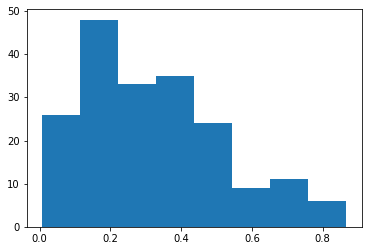

In [9]:
plt.hist(y_pred_prob[:, 1], bins=8)
plt.show()

In [10]:
threshold = y_train.value_counts()[1] / len(y_train)
threshold

0.3576388888888889

In [12]:
y_pred = []
for i in y_pred_prob:
    if i[1] > threshold:
        y_pred.append(0)
    else:
        y_pred.append(1)
y_pred[:10]

[0, 1, 1, 0, 1, 1, 0, 0, 1, 0]

In [13]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion

array([[40, 90],
       [36, 26]])